### BIA660 Team Project - Text Mining on Steam Game Reviews
#### _Team members: Fang Zhang, Shan Gao, Zhuohui Jiang, Yue Yang_
<img src='files/pubg.jpg' width="30%">
- **This python file scrapes user-reviews of popular game "PUBG" from Steam Community, turns text data into structured tabular format, and writes the table into csv. file**
  - Selenium is used to scrape the dynamic web page that contains user-reviews: https://steamcommunity.com/app/578080/reviews
  - Pull all reviews until bottom of the page by executing javascript to scroll to the bottom of the window
  - Find all attributes by driver css selectors, including: 
      - user comment date
      - user reviews
      - user recommended or not
      - how many hours spend on this game
      - how many games user hold in his/her account
      
- **The tabular format that written into csv file is shown as follows:**   

| comment_date | user_reviews                                      | Recommended or not | spent_hours | hold_products |
|--------------|---------------------------------------------------|--------------------|-------------|---------------|
| November22   | "Great game, good to play with friends and.."     | Recommended        | 1,592.0     | 5,234         |
| November 22  | 'Product received for free', '', 'Good gamepl..." | Recommended        | 439.7       | 42            |

- **The function SteamReviewsScraper() has two inputs:**  *executable_path, write_csv_path*
   - executable_path defines as the path where you store your webdriver. If you are not using Chrome driver, then need to 
     change this line of code:
     - e.g *executable_path = r"C:\Users\50692\Downloads\chromedriver_win32\chromedriver"*
   - If you are not using Chrome driver, then need to change this line of code:
     - *driver = webdriver.Chrome(executable_path=executable_path)* , subsititue "webdriver.Chrome" with other browser names if you don't use   Chrome browser
   - write_csv_path defines as the path where you store the output csv file 
     - e.g *write_csv_path = r"C:\zf\SIT\BIA660\Project\Steam_reviews.csv"*

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions 
import time
import re
import pandas as pd

def SteamReviewsScraper(executable_path,write_csv_path):
    
    # initiator the webdriver for Chrome browser
    driver = webdriver.Chrome(executable_path=executable_path)

    # send a request
    driver.get("https://steamcommunity.com/app/578080/reviews")

    src_updated = driver.page_source
    src = ""

    while src != src_updated:

        # save page source (i.e. html document) before page-down
        src = src_updated

        # execute javascript to scroll to the bottom of the window
        # you can also use page-down
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # sleep to allow content loaded
        time.sleep(4)

        # save page source after page-down
        src_updated = driver.page_source

    # find user review content by selecting div attribute "apphub_CardTextContent"
    list_content = []
    contents = driver.find_elements_by_css_selector("div.apphub_CardTextContent")
    for text in contents:
        list_content.append(text.text)

    # extract date and reviews from list_content
    list_split = [x.split("\n") for x in list_content]
    list_date = [item[0] for item in list_split]
    list_reviews = [item[1:] for item in list_split]

    # find patterns of date using regular expression 
    pattern_date = r"\w+\s\d+"
    list_date = re.findall(pattern_date,str(list_date))

    # find wether the user recommended or not by selecting div attribute title
    list_recom = []
    recom = driver.find_elements_by_css_selector("div.title")
    for label in recom:
        list_recom.append(label.text)

    # find how many hours the user play this game
    list_hours = []
    hours = driver.find_elements_by_css_selector("div.hours")
    for hour in hours:
        list_hours.append(hour.text)
    # extract only numbers by using split
    list_hour = []
    for item in list_hours:
        list_hour.append(item.split()[0])

    # find how many games the user who left a comment hold in steam account
    list_store = []
    store = driver.find_elements_by_css_selector("div.apphub_CardContentMoreLink.ellipsis")
    for item in store:
        list_store.append(item.text)
    # extract only numbers by using split
    list_store_all = [x.split() for x in list_store]
    for i,x in enumerate(list_store_all):
        if not x:
            list_store_all[i] = ['0'] * 4
    list_stores = [y[0] for y in list_store_all]

    # create a list to zip all scraping content
    # including list_date, list_reviews,list_recom,list_hour,list_stores
    df_content = list(zip(list_date, list_reviews,list_recom,list_hour,list_stores))
    df = pd.DataFrame(df_content,columns=["comment_date","user_reviews","recommended or not",
                                         "spent_hours","hold_products"])

    # write dataframe into csv 
    df.to_csv(write_csv_path)

# call the function, scraped data will be written into csv.file
executable_path = r"C:\Users\50692\Downloads\chromedriver_win32\chromedriver"
write_csv_path = r"C:\zf\SIT\BIA660\Project\Steam_reviews.csv"
SteamReviewsScraper(executable_path,write_csv_path)

  ### **Exploratory Data Analysis**
  
 **Take a glimpse of user characteristics by taking some simple exploratory data analysis on the dataset.**
<img src="files/eda1.png", width="50%">
   - **From bar chart above, x-axis represents two groups: *users who recommend this game, users who don't recommend this game*, y axis represents *how many hours user spent on this game.* **
      - users who didn’t recommended this game were all playing less than around 1,800 hours. On the other hand, those who have been played over 1,900 hours all recommended this game.
<img src="files/eda2.png" width="50%">
   - **From scatter plot above, x-axis represents *the numbers of PC games the user hold in his account*, y-axis represents *how many hours user spent on this game.***
      - we can see that the more PC games user hold in his account, the less hours the user would spent on PUBG game.

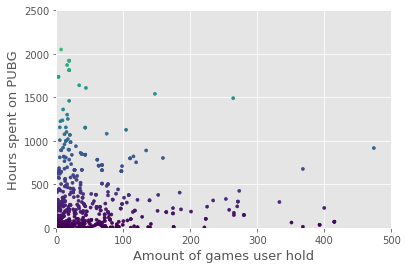

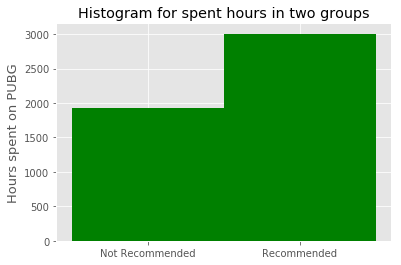

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def EDA(filename_path):
    # import the csv file obtained from SteamReviewsScraper
    df = pd.read_csv(filename_path)
    # type(spent_hours) now is string, convert string into float by creating a list
    df_hours = []
    for item in df["spent_hours"]:
        df_hours.append(float(item.replace(",","")))
    # type(hold_products) now is string, convert string into float by creating a list
    df_products = []
    for item in df["hold_products"]:
        df_products.append(float(item.replace(",","")))
    # plot a scatterplot describes the correlation between amount of games user
    # hold in his repository and how many hours he spent on PUBG
    plt.scatter(df_products,df_hours,s=10,c=df_hours)
    plt.xlim(0, 500)
    plt.ylim(0,2500)
    plt.xlabel("Amount of games user hold",fontsize=13)
    plt.ylabel("Hours spent on PUBG",fontsize=13)
    plt.show()

    # type(recommended or not ) is object, convert object to string by creating a list
    df_recom = []
    for item in df.iloc[:,3]:
        df_recom.append(str(item))

    # plot the histogram which describes how many hours user spent on PUBG
    # for two groups
    plt.style.use('ggplot')
    plt.bar(df_recom, df_hours, color='green',width=1)
    plt.ylabel("Hours spent on PUBG",fontsize=13)
    plt.title("Histogram for spent hours in two groups")
    plt.show()
    
# call the function, the output is two pictures described as markdown
filename_path = r"C:\zf\SIT\BIA660\Project\steam_reviews.csv"
EDA(filename_path)

  ### **VADER Sentiment Analysis**
  
 - VADER analyzes a piece of text to see if any of the words in the text is present in the lexicon. Sentiment metrics are derived from the ratings of such words** 
 - **Positive, neutral and negative score** represent the proportion of the text that falls into those categories

- The tabular format after we got the sentiment scores is as follows :

| text | Recommendation                                     |  compound | neg | neu |  pos |
|--------------|------------------------------------------|--------------------|-------------|---------------|
|  ['So, after playing this game for 300+ hours i... |   Not Recommended | 0.8364 | 0.097     | 0.771   |0.132        |
| ["It's been 1500 hours almost and still I come...	 |Recommended| 0.9543 | 0.079       | 0.725     |0.196|

- Our result shows that for three sentiment altitude: Positive,Neutral, and Negative, the accuracy is as follows:

<img src="files/VADER.png", width="50%">
 
   - **VADER has a good performance on analyzing positive sentiment and bad performance on analyzing negative sentiment. Also, 15.9% of text data are grouped into neutral sentiment.**
 

Accuracy in positive sentiment: 0.38461538461538464
Accuracy in negative sentiment: 0.5481481481481482
Percentage of number of <Recommended> in neutral sentiment: 0.49230769230769234
Percentage of number of <Not Recommended> in neutral sentiment: 0.5076923076923077


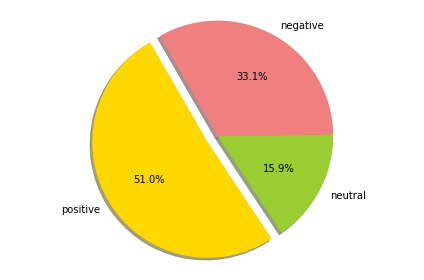

In [13]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# import the csv file for sentiment analysis
train_file = r"C:\zf\SIT\BIA660\Project\steam_reviews.csv"
df = pd.read_csv(train_file)
# filter reviews by lenth of reivews greater than 30
text_long = []
for text in df["user_reviews"]:
    if len(text)>30:
        text_long.append(text)

# initial VADER analyzer 
sid = SentimentIntensityAnalyzer()
# create a list of dict to store positive, neutral and negative scores
score = []
for text in text_long:
    ss = sid.polarity_scores(text)
    score.append(ss)
# create a new dataframe, in which each user reviews has its scores
df_score = pd.DataFrame.from_dict(score)
df_score["text"] =df["user_reviews"]
df_score["Recommendation"] = df.iloc[:,3]
# change the order of df_score columns, putting text into the first column
cols= df_score.columns.tolist()
cols = cols[-2:] + cols[:-2]
df_score = df_score[cols]
df_score.head()

# positive sentiment 
df_positive = df_score[df_score['compound'] >= 0.05 ]
# how many "Not recommended" in positive sentiment
positive_num = len(df_positive.loc[df_positive['Recommendation'] =="Recommended" ])
# Accuracy percentage
positive_percent =positive_num/len(df_positive)
# print out result
print("Accuracy in positive sentiment:",positive_percent)

# negative sentiment
df_negative = df_score[df_score['compound'] <= -0.05 ]
# how many "Not recommended" in positive sentiment
negative_num =  len(df_negative.loc[df_negative['Recommendation'] =="Not Recommended" ])
# Accuracy percentage
negative_percent =negative_num/len(df_negative)
# print out result
print("Accuracy in negative sentiment:",negative_percent)

# neutral sentiment whose compound score is between -0.05 and 0.05 
df_neutral = df_score.query("-0.05 < compound < 0.05")
count_Recom = len(df_neutral.loc[df_neutral['Recommendation'] =="Recommended" ])
count_NotRecom = len(df_neutral.loc[df_neutral['Recommendation'] =="Not Recommended" ])
print("Percentage of number of <Recommended> in neutral sentiment:",count_Recom/len(df_neutral))
print("Percentage of number of <Not Recommended> in neutral sentiment:",count_NotRecom/len(df_neutral))

# bar chart for proportion of size among positive, neutral and negative
sizes = [len(df_positive),len(df_neutral),len(df_negative)]
labels = ["positive","neutral","negative"]
colors = ["gold", "yellowgreen", 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.tight_layout()
plt.show()

# call the function
#train_file = r"C:\zf\SIT\BIA660\Project\steam_reviews.csv"
#VADERAnalyzer(train_file)

  ### **Topic Modeling**

 - With LDA modeling, we want to generate topics in which key words are contained, and then find something useful within each of the topics.
 - In this block of code, we extract 4-grams noun from the reviews

In [34]:
def extract_nouns(file_path):
    
    # Sentence is used as the grain of a sample
    # get samples from the reviews
    df = pd.read_csv(file_path)
    df['review'] = df['user_reviews'].apply(lambda row: ' '.join(re.findall(r'[\w\.]+',row)))
    review = df['review'].tolist()
    review_sen = []
    for item in review:
        review_sen_single = []
        review_sen_single = nltk.sent_tokenize(item)
        review_sen += review_sen_single

    # filtering out the short samples     
    review_sen = [' '.join(re.findall(r'\w+',sen)) for sen in review_sen if len(review_sen)>=30]

    # get Nouns from each sentence
    is_noun = lambda pos: pos[:2] == 'NN' 

    reviews = []
    reviews_noun = []

    for sen in review_sen:
        tokens = nltk.word_tokenize(sen)
        nouns = [w for (w,pos)in nltk.pos_tag(tokens) if is_noun(pos)]
        if len(nouns)>1 and len(sen.split(' ')) > 2:
            reviews_noun.append(' '.join(nouns))
            reviews.append(sen)     
            
# call the function
filepath = r"C:\zf\SIT\BIA660\Project\steam_reviews.csv"
extract_nouns(file_path)

 - In this block of code, we train the LDA selecting 3 topics, and generate WordCloud for each of the topics.
 - From observation, we select represent word for these 3 topics:
      - **Topic 0: Hacker**
      - **Topic 1: Bug**
      - **Topic 2: Server**
 

c:\programdata\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topic 0:
[('time', 115.17658424834603), ('server', 104.48963006149992), ('player', 76.75845902229156), ('issue', 41.34881025771583), ('pc', 26.68310103519463), ('day', 23.07018859633752), ('lag', 17.773368298527046), ('performance', 16.236698927622584), ('setting', 16.027965985547322), ('year', 15.590693701434851), ('optimization', 15.468015391602183), ('bluehole', 13.740356097980978), ('update', 12.141573654344963), ('playing', 11.66802865492456), ('anything', 11.043530632211006), ('bad', 10.93474902886422), ('synchronization', 10.26002460798761), ('help', 9.746709646077917), ('hour', 9.460902789551861), ('team', 9.450653804411536), ('break', 9.079203481943601), ('beta', 8.926427477976569), ('movement', 8.9184260656107), ('gaming', 8.755408541888663), ('stability', 8.304354128775268), ('chinese', 8.263984183847644), ('ea', 8.213543824266152), ('gtx', 7.974801562426846), ('medium', 7.883141827416973), ('world', 7.7444234444629005)]


Topic 1:
[('friend', 43.60973560221818), ('hacker', 

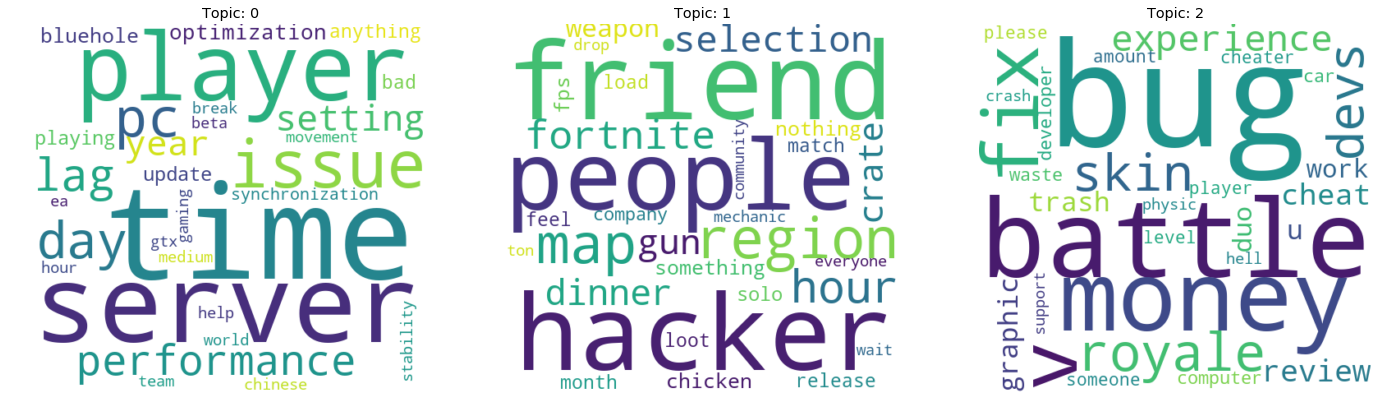

In [37]:
# Lemmatizer
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self,articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

stop_words1 = stopwords.words('english')+['game','players','pubg','play','lot','product','fun',\
                                         'way','thing','gameplay','problem']

tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),strip_accents = 'unicode', \
                                stop_words = stop_words1, lowercase = True, max_df = 0.95, \
                                min_df = 4) 

tf = tf_vectorizer.fit_transform(reviews_noun)
tf_feature_names = tf_vectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_components=3).fit(tf)

num_top_words = 30
for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d:" % (topic_idx))
    words=[(tf_feature_names[i],topic[i]) \
           for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")
    
f, axarr = plt.subplots(1, 3, figsize=(24, 8));
num_top_words = 30
for topic_idx, topic in enumerate(lda.components_):
    # create a word:count dictionary
    f={tf_feature_names[i]:topic[i] for i in topic.argsort()[::-1][0:num_top_words]}
        
    # generate wordcloud in subplots
    wordcloud = WordCloud(width=480, height=450, margin=0, background_color="white");
    _ = wordcloud.generate_from_frequencies(frequencies=f)   
    _ = axarr[math.floor(topic_idx)].imshow(wordcloud, interpolation="bilinear");
    _ = axarr[math.floor(topic_idx)].set_title("Topic: "+str(topic_idx));
    _ = axarr[math.floor(topic_idx)].axis('off')
plt.show()    

  ### **Classification**
  
  - The reason why classification is to find potential problem from predicated sentiment reviews
  - Predicated sentiment reviews are classified by the classification model.
  - Then we try to find meaning from those predicated sentiment reviews.
     
  
  <img src="files/Classification.png", width="70%">
 
 - **To do classification:**
    - Firstly, we train three models:MultinominalNB, SVM, Logistic Regression to see which one has the best performance
    - Secondly, we select the best performance model to generate top 10 words with highest tf-idf score
    - Thirdly, we use Word2Vec to find most similar words from each of top 10 words
    - Fourthly, summary from the result given
    
    
#### From block of code below, we can see that SVM get the best performance! ####

                 precision    recall  f1-score   support

Not Recommended       0.76      0.95      0.84        88
    Recommended       0.93      0.66      0.77        80

    avg / total       0.84      0.82      0.81       168



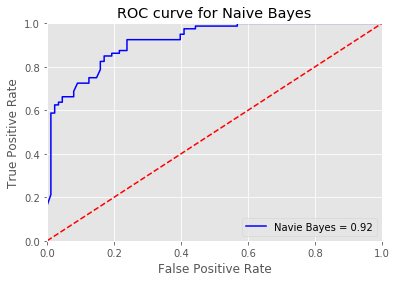

                 precision    recall  f1-score   support

Not Recommended       0.77      0.97      0.85        88
    Recommended       0.95      0.68      0.79        80

    avg / total       0.85      0.83      0.82       168



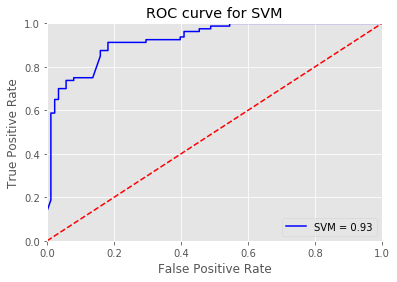

                 precision    recall  f1-score   support

Not Recommended       0.73      0.98      0.83        88
    Recommended       0.96      0.60      0.74        80

    avg / total       0.84      0.80      0.79       168



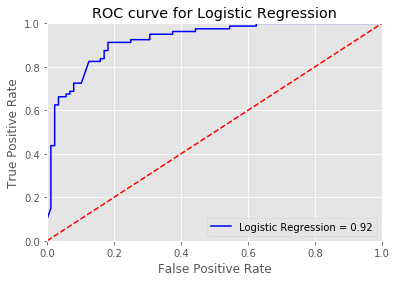

In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression

def classification_model(file_path):
    # import dataset
    df =pd.read_csv(file_path,header=0)
    # initialize tfiidfVectorize with stop words removed
    tfidf_vect = TfidfVectorizer(stop_words="english") 
    # generate tfidf matrix
    dtm= tfidf_vect.fit_transform(df["user_reviews"])

    # split dataset into train (70%) and test sets (30%)
    x_train, x_test, y_train, y_test = train_test_split(
        dtm, df["recommended or not"], test_size=0.3, random_state=0)
    # train a multinomial naive Bayes model using the training data
    clf = MultinomialNB().fit(x_train, y_train)
    # predict the news group for the test dataset
    predicted=clf.predict(x_test)
    # get the list of unique labels
    labels=sorted(df["recommended or not"].unique())
    # get all performance metrics
    print(classification_report\
          (y_test, predicted, target_names=labels))

    # plot ROC curve for NB model
    probs = clf.predict_proba(x_test)
    preds = probs[:,1]
    # create a binary list for y_test
    y_binary = []
    for y in y_test:
        if y=="Recommended":
            y_binary.append(1)
        else:
             y_binary.append(0)

    # set up parameters for ROC curve
    fpr, tpr, threshold = metrics.roc_curve(y_binary, preds)
    roc_auc = metrics.auc(fpr, tpr)
    # plot the ROC curve
    plt.title("ROC curve for Naive Bayes")
    plt.plot(fpr, tpr, 'b', label = 'Navie Bayes = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    # train a svm model using the training data
    clf2 = svm.SVC(kernel='linear',probability=True).fit(x_train, y_train)
    # predict the news group for the test dataset
    predicted2 = clf2.predict(x_test)
    # get all performance metrics
    print(classification_report(y_test, predicted2, target_names=labels))
    # get probability for text data
    prob2 = clf2.predict_proba(x_test)
    preds2 = prob2[:,1]
    # Compute ROC curve and area the curve
    fpr2, tpr2, thresholds2 = roc_curve(y_binary, preds2)
    roc_auc2 = metrics.auc(fpr2, tpr2)

    # plot the ROC curve
    plt.title("ROC curve for SVM")
    plt.plot(fpr2, tpr2, 'b', label = 'SVM = %0.2f' % roc_auc2)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    # train a svm model using the training data
    clf3 = LogisticRegression().fit(x_train, y_train)
    # predict the news group for the test dataset
    predicted3 = clf3.predict(x_test)
    # get all performance metrics
    print(classification_report(y_test, predicted3, target_names=labels))
    # plot ROC curve for LR model
    probs3 = clf3.predict_proba(x_test)
    preds3 = probs3[:,1]
    # Compute ROC curve and area the curve
    fpr3, tpr3, thresholds3 = roc_curve(y_binary, preds3)
    roc_auc3 = metrics.auc(fpr3, tpr3)

    # plot the ROC curve
    plt.title("ROC curve for Logistic Regression")
    plt.plot(fpr3, tpr3, 'b', label = 'Logistic Regression = %0.2f' % roc_auc3)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
# call the function
file_path = r"C:\zf\SIT\BIA660\Project\steam_reviews.csv"
classification_model(file_path)

## Word Interpretation

- Choose top 10 words with highest tf-idf from negative reviews 
- Then use Word2Vec to find out the most similar words with top 10 words
- Get conclusion from the correlated meaning
   - **Result:** 
        - **1. A lot of game issues**
        - **2. Serious time delay for server lags**
        - **3. Devs(Developer) fix the bug**
        - **4. Vehicle issue in game**
        - **5. Waste money**

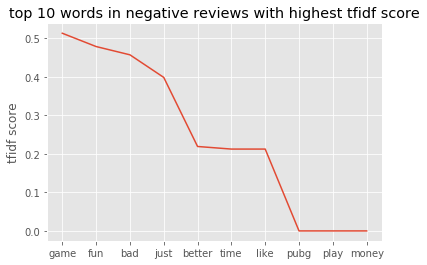

Most similar words with game [('issues', 0.9998298287391663), ('time', 0.9998172521591187), ('get', 0.999815821647644), ('para', 0.9998142719268799), ('of', 0.9997985363006592), ('have', 0.9997943639755249), ('are', 0.9997904300689697), ('royale', 0.9997849464416504), ('skins', 0.9997745752334595), ('much', 0.9997739791870117)] 

Most similar words with fun [('dying', 0.9959768056869507), ('done', 0.9957764148712158), ('turned', 0.9951372146606445), ('horrible', 0.9948542714118958), ('kampen', 0.9947428703308105), ('dring', 0.9947314262390137), ('dive', 0.9946900606155396), ('death', 0.9945041537284851), ('started', 0.9944744110107422), ('been', 0.994408905506134)] 

Most similar words with bad [('vehicle', 0.9954615831375122), ('reason', 0.9953230619430542), ('broken', 0.9951791763305664), ('maxiumum', 0.995131254196167), ('optimisation', 0.9949763417243958), ('expensive', 0.9948619604110718), ('na', 0.9948505163192749), ('work', 0.9948046803474426), ('perfect', 0.9948019981384277), (

c:\programdata\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [131]:
from gensim.models import word2vec
import nltk,string

# initialize tfiidfVectorize with stop words removed
tfidf_vect1 = TfidfVectorizer(stop_words="english",min_df=0.1,max_df=0.9) 
df_neg = df[df["recommended or not"] == "Not Recommended"]
dtm_neg = tfidf_vect1.fit_transform(df_neg["user_reviews"])

# get mapping from word index to word
# i.e. reversal mapping of tfidf_vect.vocabulary_
voc_lookup={tfidf_vect1.vocabulary_[word]:word for word in tfidf_vect1.vocabulary_}
# first, covert the sparse matrix row to a dense array
doc0=dtm_neg[0].toarray()[0]
# get index of top 20 words
top_words=(doc0.argsort())[::-1][0:20]
word_tfidf = [(voc_lookup[i], doc0[i]) for i in top_words]

# x-axis with top 10 words
x = np.arange(1,11)
x_ticks = [x[0] for x in word_tfidf[0:10]]
plt.xticks(x, x_ticks)
# y-axis with top 10 tfidf score correspond with top 10 words
y = [y[1] for y in word_tfidf[0:10]]
plt.title("top 10 words in negative reviews with highest tfidf score")
plt.ylabel("tfidf score")
plt.plot(x,y)
plt.show()

# tokenize each document into a list of unigrams
# strip punctuations and leading/trailing spaces from unigrams
# only unigrams with 2 or more characters are taken
sentences=[ [token.strip(string.punctuation).strip() 
             for token in nltk.word_tokenize(doc.lower()) 
             if token not in string.punctuation and len(token.strip(string.punctuation).strip())>=2]
           for doc in df.user_reviews]
wv_model = word2vec.Word2Vec(sentences, min_count=2, size=25, window=30, workers=4)
print("Most similar words with game",wv_model.wv.most_similar('need', topn=10),"\n")
print("Most similar words with fun",wv_model.wv.most_similar('building', topn=10),"\n")
print("Most similar words with bad",wv_model.wv.most_similar("defend", topn=10),"\n")
print("Most similar words with just",wv_model.wv.most_similar("things", topn=10),"\n")
print("Most similar words with better",wv_model.wv.most_similar("kinda", topn=10),"\n")
print("Most similar words with time",wv_model.wv.most_similar("later", topn=10),"\n")
print("Most similar words with like",wv_model.wv.most_similar("playing", topn=10),"\n")
print("Most similar words with pubg",wv_model.wv.most_similar("loot", topn=10),"\n")
print("Most similar words with play",wv_model.wv.most_similar("im", topn=10),"\n")
print("Most similar words with money",wv_model.wv.most_similar("overall", topn=10),"\n")

## Reference
1. https://stackoverflow.com/questions/47423854/sklearn-adding-lemmatizer-to-countvectorizer
2. **Professor.Rong.Liu's teaching note from class**